In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
path = r'C:\Users\User\dev\training_model\dataset\modified_financial_data.csv'
df = pd.read_csv(path)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

df['SPX'] = df['^GSPC']
df['EUR/USD'] = df['EURUSD=X']
drop = ['^GSPC', 'EURUSD=X']
df = df.drop(columns=drop)

# Select features and target
features = ['SPX', 'USO', 'SLV', 'EUR/USD']
target = 'GLD'

# Normalize features and target
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

# Convert to sequences
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(seq_length, len(X)):
        X_seq.append(X[i-seq_length:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

sequence_length = 60
X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\User\dev\training_model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0128 - val_loss: 0.0058
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0020 - val_loss: 0.0068
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0018 - val_loss: 0.0155
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0015 - val_loss: 0.0185
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0

In [7]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


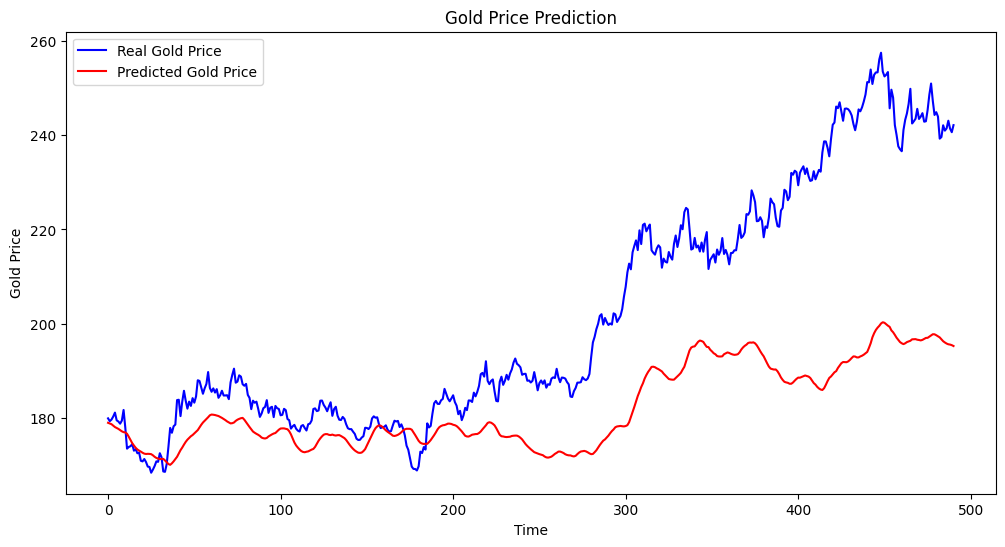

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, color='blue', label='Real Gold Price')
plt.plot(y_pred_rescaled, color='red', label='Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()


In [11]:
print("Final training loss:", history.history['loss'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

Final training loss: 0.00054122757865116
Final validation loss: 0.0061952811665833


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you already have these from predictions:
# y_test_rescaled, y_pred_rescaled

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.4f}')

RMSE: 26.10
MAE: 19.66
R² Score: -0.0729


**Increased dropout**

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.4))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(1))

c:\Users\User\dev\training_model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0228 - val_loss: 0.0070
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0043 - val_loss: 0.0054
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0033 - val_loss: 0.0062
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0036 - val_loss: 0.0055
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0032 - val_loss: 0.0050
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0025 - val_loss: 0.0096
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


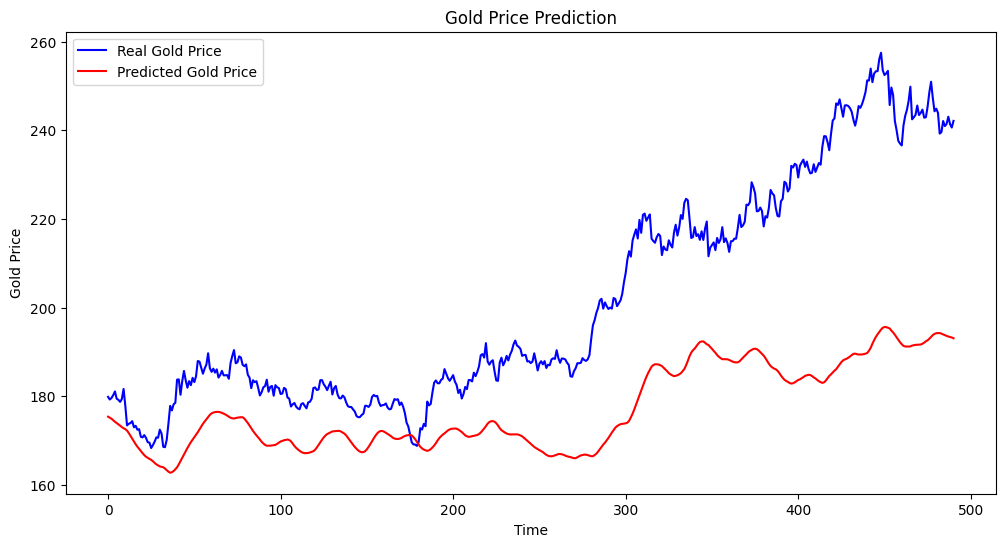

RMSE: 29.61
MAE: 24.28
R² Score: -0.3810


In [16]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, color='blue', label='Real Gold Price')
plt.plot(y_pred_rescaled, color='red', label='Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.4f}')

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/50


c:\Users\User\dev\training_model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0167 - val_loss: 0.0021
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0041 - val_loss: 9.3681e-04
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0017 - val_loss: 0.0012
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
RMSE: 15.48
MAE: 11.92
R² Score: 0.6245
Final training loss: 0.001614
Final validation loss: 0.001211


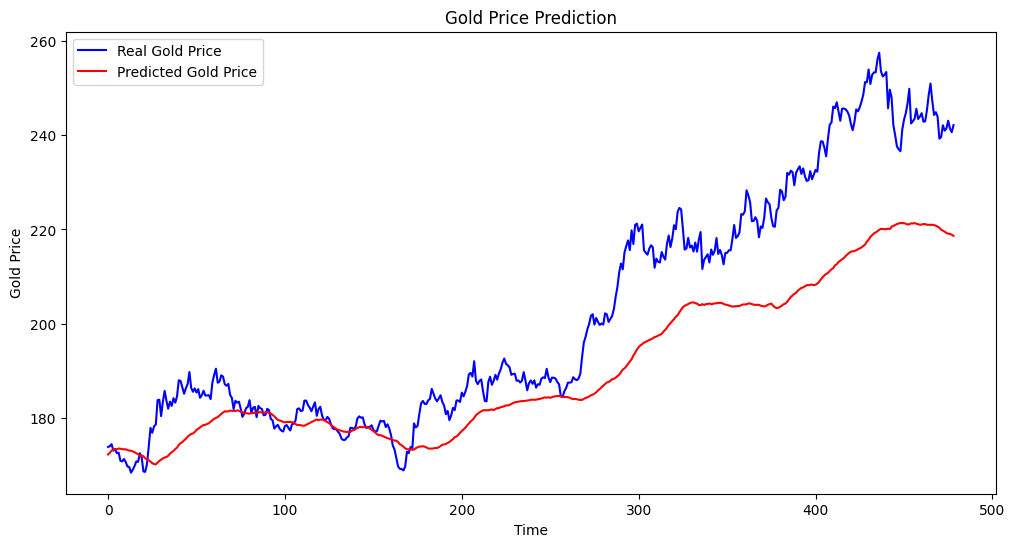

In [20]:
df = pd.read_csv(path)  # replace with your file path
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

df['SPX'] = df['^GSPC']
df['EUR/USD'] = df['EURUSD=X']
drop = ['^GSPC', 'EURUSD=X']
df = df.drop(columns=drop)

# Add optional moving average feature
df['GLD_MA_30'] = df['GLD'].rolling(window=30).mean()
df.dropna(inplace=True)  # drop rows with NaN due to rolling mean

# Features and target
features = ['SPX', 'USO', 'SLV', 'EUR/USD', 'GLD_MA_30']
target = 'GLD'

# Normalize
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(seq_len, len(X)):
        X_seq.append(X[i-seq_len:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

sequence_length = 90
X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)

split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Training with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.1, callbacks=[early_stop])

# Predict
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.4f}')
print(f"Final training loss: {history.history['loss'][-1]:.6f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.6f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Real Gold Price', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Gold Price', color='red')
plt.title('Gold Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()